In [1]:
%matplotlib inline

In [2]:
total_cycles = 20000

In [3]:
%%time

import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from oz import config
from oz.world.world import World
from oz.world.settings import Settings
from oz.runner.runner import Runner
from oz.agent.agent import Agent

_settings = Settings(config, config.DEFAULT_BOARD_NUMBER_OF_LINES, 
                     config.DEFAULT_NUMBER_OF_STONES, 2)

from oz.affordances.agent0 import Agent0
_world = World(_settings, [Agent, Agent0])

_runner = Runner(_world, resolution=config.DEFAULT_DISPLAY_RESOLUTION,
                 transparent_color_key=config.DEFAULT_TRANSPARENT_COLOR_KEY)
_runner.run(cycles=total_cycles, display_hz=0)


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
CPU times: user 8min 56s, sys: 1min 16s, total: 10min 12s
Wall time: 5min 9s


In [4]:
import numpy as np
predictions = np.array(_world.agents[1].all_predictions)[-100:-1,]
actuals = np.array(_world.agents[1].all_actuals)[-100:-1,]
r = actuals.shape[0]

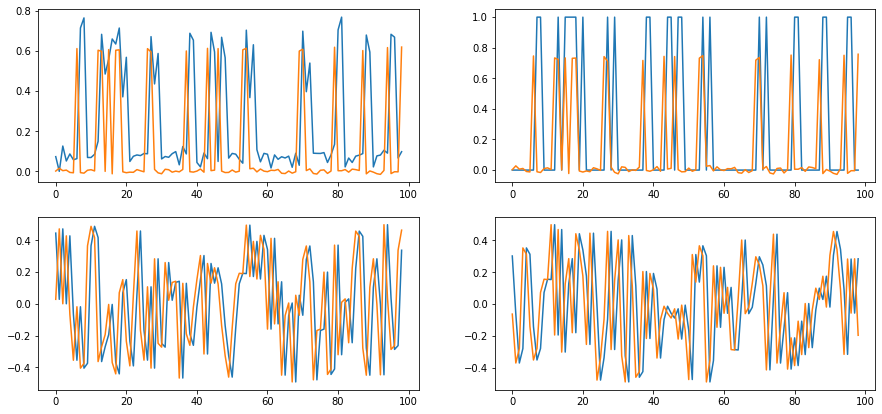

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
ax_v, ax_t, ax_k1, ax_k2 = ax.flatten()
ax_v.plot(np.arange(r), actuals[:,0])
ax_v.plot(np.arange(r), predictions[:,0])
ax_t.plot(np.arange(r), actuals[:,1])
ax_t.plot(np.arange(r), predictions[:,1])
ax_k1.plot(np.arange(r), actuals[:,2])
ax_k1.plot(np.arange(r), predictions[:,2])
ax_k2.plot(np.arange(r), actuals[:,3])
ax_k2.plot(np.arange(r), predictions[:,3])

In [6]:
_world.agents[1].weights # 300000

array([[ 1.30252524e-02, -2.30886808e-02,  6.10291207e-01],
       [ 2.55293358e-02, -4.44430954e-02,  7.39994280e-01],
       [ 9.99999944e-01,  1.49579851e-09, -1.52627406e-10],
       [ 1.51481777e-09,  9.99999953e-01,  6.59754453e-10]])

In [7]:
_world.agents[1]._all_predictions[-1]

array([[-0.00835829],
       [-0.01628027],
       [-0.41885745],
       [ 0.12571391]])

In [8]:
_world.agents[1]._all_actuals[-1]

array([[ 0.72605761],
       [ 1.        ],
       [ 0.46301313],
       [-0.19600519]])